In [1]:
#请你基于 PyTorch 构建一个全连接神经网络，网络结构如下：

#输入层：5 个神经元

#隐藏层1：8 个神经元，激活函数使用 ReLU

#隐藏层2：6 个神经元，激活函数使用 Tanh

#输出层：4 个神经元，输出未经过激活函数的 logits（因为 nn.CrossEntropyLoss 内部会计算 softmax）

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(5, 8)
    self.layer2 = nn.Linear(8, 6)
    self.layer3 = nn.Linear(6, 4)

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.tanh(self.layer2(x))
    x = self.layer3(x)

    return x

epoch: 1 loss: 1.4679
epoch: 101 loss: 1.3819
epoch: 201 loss: 1.3121
epoch: 301 loss: 1.2403
epoch: 401 loss: 1.1620
epoch: 501 loss: 1.0830
epoch: 601 loss: 1.0110
epoch: 701 loss: 0.9507
epoch: 801 loss: 0.9056
epoch: 901 loss: 0.8704
epoch: 1001 loss: 0.8430
epoch: 1101 loss: 0.8206
epoch: 1201 loss: 0.8016
epoch: 1301 loss: 0.7841
epoch: 1401 loss: 0.7669
epoch: 1501 loss: 0.7499
epoch: 1601 loss: 0.7332
epoch: 1701 loss: 0.7156
epoch: 1801 loss: 0.6967
epoch: 1901 loss: 0.6765
epoch: 2001 loss: 0.6552
epoch: 2101 loss: 0.6325
epoch: 2201 loss: 0.6078
epoch: 2301 loss: 0.5794
epoch: 2401 loss: 0.5491
epoch: 2501 loss: 0.5181
epoch: 2601 loss: 0.4849
epoch: 2701 loss: 0.4493
epoch: 2801 loss: 0.4118
epoch: 2901 loss: 0.3730
epoch: 3001 loss: 0.3341
epoch: 3101 loss: 0.2965
epoch: 3201 loss: 0.2614
epoch: 3301 loss: 0.2299
epoch: 3401 loss: 0.2034
epoch: 3501 loss: 0.1803
epoch: 3601 loss: 0.1602
epoch: 3701 loss: 0.1425
epoch: 3801 loss: 0.1272
epoch: 3901 loss: 0.1139
epoch: 4001 

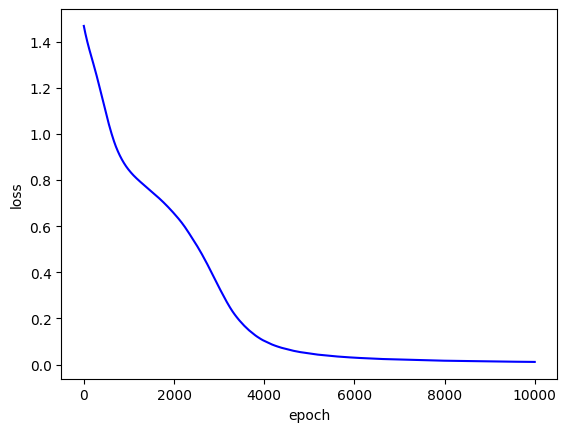

In [7]:
#数据准备
#构造随机输入数据 x，形状为 (12, 5)（即 12 个样本，每个样本 5 维）。
#构造目标标签 y_true，形状为 (12,)，值为 0~3 中的整数。

x = torch.randn(12, 5)
y_true = torch.tensor([0, 1, 3, 2, 0, 1, 2, 3, 1, 0, 2, 3])

losses = []
epochs = 10000

model = SimpleNN()

#定义优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
  y_pred = model(x)

  #计算损失函数
  loss = criterion(y_pred, y_true)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%100 ==0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")

final_prediction = model(x)
y_pred = torch.argmax(final_prediction, dim=1)
print("\n the final prediction is:")
print(final_prediction)
print("\n the prediction value is:")
print(y_pred)
print("\n the true value is:")
print(y_true)

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()